***Color manual***

<div class="alert alert-block alert-success">
<b>Green - Libraries</b>
</div>

<div class="alert alert-block alert-info">
<b>Blue - Information</b>
</div>

<div class="alert alert-block alert-danger">
<b>Red - Problems</b>
</div>

***

<div class="alert alert-block alert-success">
<b>Import libraries</b>
</div>

In [1]:
import numpy as np
import chart_studio
import sympy as sym
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import chart_studio.plotly as py

from sympy import *

%matplotlib inline
sns.set_style("white")
chart_studio.tools.set_config_file(world_readable = True, sharing = 'public')

<div class="alert alert-block alert-info">
<b>Easy plot of both the function and their indefinite integral (Matplotlib)</b>
</div>

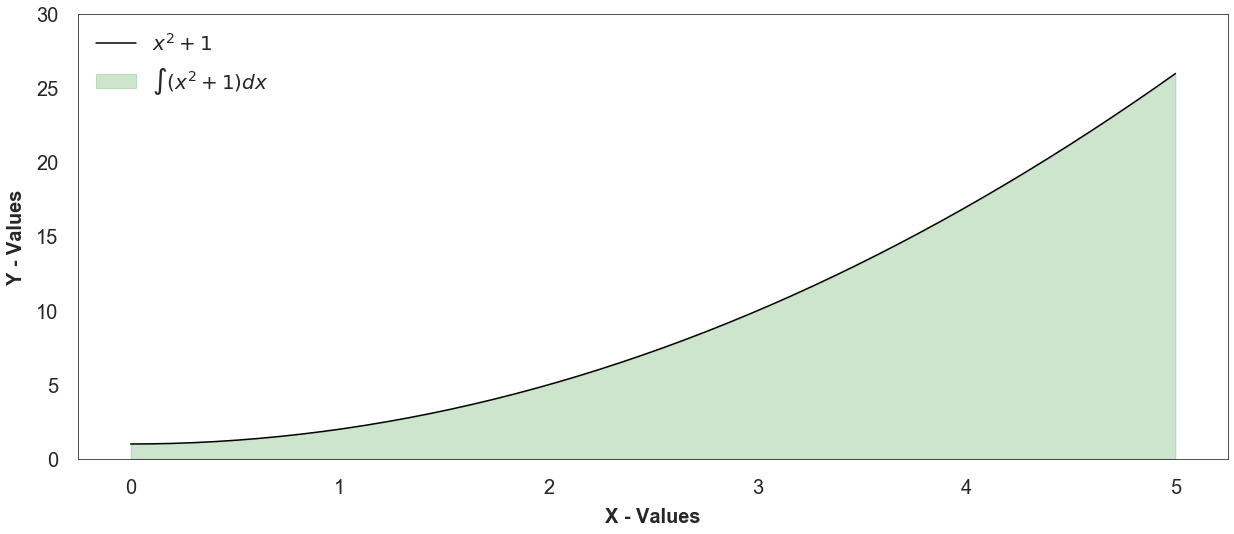

In [2]:
x = np.linspace(0, 5)

def equation(x): return x**2 + 1

plt.figure(figsize = (20,10))
plt.rc('font', weight = 'normal') 
plt.xlabel('X - Values', weight = 'bold', fontsize = 20, labelpad = 10)
plt.ylabel('Y - Values', weight = 'bold', fontsize = 20,  labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 10, size = 10)                                
plt.tight_layout(pad = 10) 
plt.plot(x, equation(x), label = r'$x^2+1$', color = 'black')
plt.fill_between(x, equation(x), label = r'$\int(x^2+1)dx$', color = 'green', alpha = 0.2)
plt.ylim([0, 30])
plt.legend(loc = 'upper left', prop = {'size':20}, frameon = False)
plt.show()

<div class="alert alert-block alert-info">
<b>Harder plot of both the function and their definite integral (Matplotlib)</b>
</div>

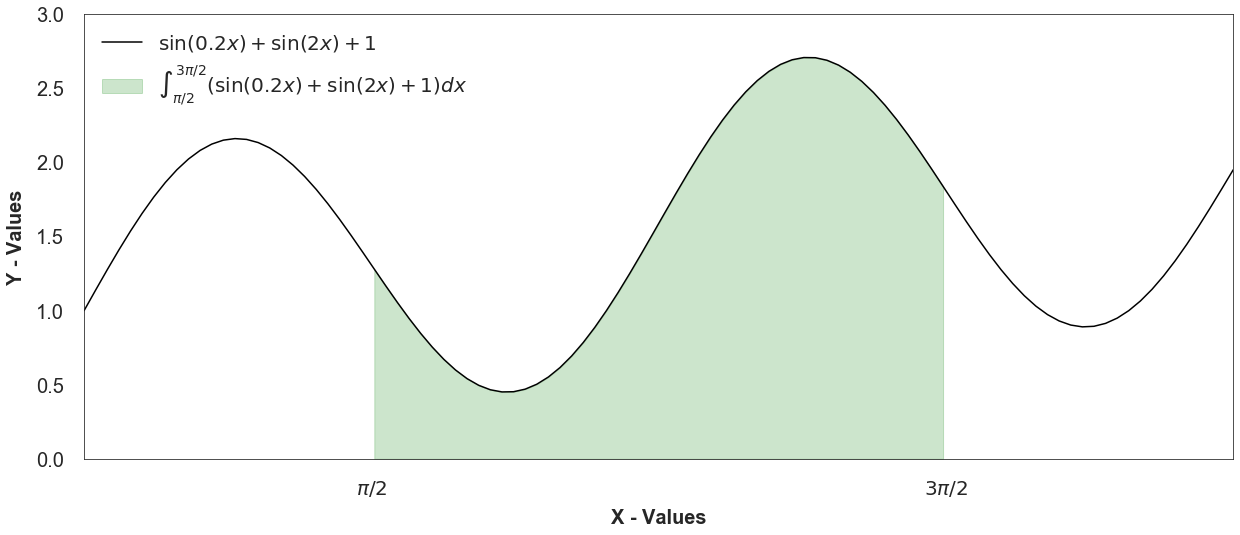

In [3]:
x = np.linspace(0, 2*np.pi, 100)

def equation(x): return np.sin(0.2*x) + np.sin(2*x) + 1

plt.figure(figsize = (20,10))
plt.rc('font', weight = 'normal') 
plt.xlabel('X - Values', weight = 'bold', fontsize = 20, labelpad = 10)
plt.ylabel('Y - Values', weight = 'bold', fontsize = 20,  labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 10, size = 10)                                
plt.tight_layout(pad = 10) 
plt.plot(x, equation(x), label = r'$\sin(0.2 x) + \sin(2x) + 1$', color = 'black')
plt.fill_between(x, equation(x), where = [(x > np.pi/2) and (x < 3*np.pi/2) for x in x], 
label = r'$\int_{\pi/2}^{3\pi/2} \left( \sin(0.2 x) + \sin(2x) + 1 \right) dx$',
color = 'green', alpha = 0.2)
plt.xticks([np.pi/2, 3*np.pi/2],['$\pi/2$','$3\pi/2$'])
plt.xlim([0, 2*np.pi]) 
plt.ylim([0, 3])
plt.legend(loc = 'upper left', prop = {'size':20}, frameon = False)
plt.show()

<div class="alert alert-block alert-info">
<b>Create symbol</b>
</div>

In [4]:
x = sym.Symbol('x')

<div class="alert alert-block alert-info">
<b>Easy plot of both the function and their indefinite integral (Plotly)</b>
</div>

In [5]:
f = x**2 + 1

equation = lambdify(x, f, modules = ['numpy'])

xvals = np.linspace(0, 5)

fig = go.Figure()

fig.add_trace(go.Scatter(x = xvals, y = equation(xvals), 
    name = r'$x^2+1$', 
    mode = 'lines',
    hoverinfo = 'x+y+text',
    line = dict(color = 'rgb(150, 150, 255)', width = 5)))

fig.add_trace(go.Scatter(x = xvals, y = equation(xvals), 
    name = r'$\int(x^2+1)dx$', 
    mode = 'lines', 
    hoverinfo = 'x+y+text',
    fill='tozeroy',
    fillcolor = 'rgba(150, 225, 180, 0.5)',
    line = dict(color = 'rgba(150, 225, 180, 0.5)', width = 5)))

fig.update_layout(legend = dict(x = .0, y = 1.3),
    xaxis_title = 'X - Values',
    yaxis_title = 'Y - Values',
    paper_bgcolor = 'rgba(1,1,1,1)',
    plot_bgcolor = 'rgba(255,255,255,255)',
    hoverlabel= dict(
    bgcolor = 'black',
    font_size = 15, 
    font_family = 'Helvetica'),
    font = dict(
    family = 'Helvetica, Helvetica',
    size = 15,
    color = 'white'))

fig.update_xaxes(hoverformat = '.3f', 
                 dtick = 1, 
                 ticks = 'outside', 
                 tickwidth = 2, 
                 tickcolor = 'black', 
                 ticklen = 10,
                 showgrid = False,
                 zeroline = False,
                 range=[0, 5])

fig.update_yaxes(hoverformat = '.3f', 
                 dtick = 5, 
                 ticks = 'outside', 
                 tickwidth = 2, 
                 tickcolor = 'black', 
                 ticklen = 10,
                 showgrid = False,
                 zeroline = False,
                 range=[1, 30])

py.iplot(fig, filename = 'Plotting indefinite integral', auto_open = False)

<div class="alert alert-block alert-info">
<b>Harder plot of both the function and their definite integral (Plotly)</b>
</div>

In [6]:
f = sym.sin(0.2*x) + sym.sin(2*x) + 1

equation = lambdify(x, f, modules = ['numpy'])

xaxis = np.linspace(0, 2*np.pi, 100)

xvals = np.linspace(np.pi/2, 3*np.pi/2)

fig = go.Figure()

fig.add_trace(go.Scatter(x = xaxis, y = equation(xaxis), 
    name = r'$\sin(0.2 x) + \sin(2x) + 1$',
    mode = 'lines', 
    hoverinfo = 'x+y+text',
    line = dict(color = 'rgb(150, 150, 255)', width = 5)))

fig.add_trace(go.Scatter(x = xvals, y = equation(xvals), 
    name = r'$\int_{\pi/2}^{3\pi/2} \left( \sin(0.2 x) + \sin(2x) + 1\right)dx$',
    mode = 'lines', 
    hoverinfo = 'x+y+text',
    fill='tozeroy',
    fillcolor = 'rgba(150, 225, 180, 0.5)',
    line = dict(color = 'rgba(150, 225, 180, 0.5)', width = 5)))
    

fig.update_layout(xaxis = dict(tickmode = 'array',
    tickvals = [np.pi/2, 3*np.pi/2],
    ticktext = ['$\pi/2$','$3\pi/2$']),
    xaxis_title = 'X - Values',
    yaxis_title = 'Y - Values',
    legend = dict(x = .0, y = 1.3),
    legend_title='<b> Equations </b>',
    paper_bgcolor = 'rgba(1,1,1,1)',
    plot_bgcolor = 'rgba(255,255,255,255)',
    hoverlabel= dict(
    bgcolor = 'black',
    font_size = 15, 
    font_family = 'Helvetica'),
    font = dict(
    family = 'Helvetica, Helvetica',
    size = 15,
    color = 'white'))

fig.update_xaxes(hoverformat = '.3f', 
                 dtick = 0, 
                 ticks = 'outside', 
                 tickwidth = 2, 
                 tickcolor = 'black', 
                 ticklen = 10,
                 showgrid = False,
                 zeroline = False,
                 range=[0,2*np.pi])

fig.update_yaxes(hoverformat = '.3f', 
                 dtick = 0.5, 
                 ticks = 'outside', 
                 tickwidth = 2, 
                 tickcolor = 'black', 
                 ticklen = 10,
                 showgrid = False,
                 zeroline = False,
                 range=[0.1, 3])

py.iplot(fig, filename = 'Plotting definite integral', auto_open = False)